In [42]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

In [43]:
df_ROSF = pd.read_csv('../../datasets/RecurrenceOfSurgery_Final.csv')
df_ROSF

,Unnamed: 0,환자ID,신장,체중,연령,성별,Large Lymphocyte,우울증여부,종양진행여부,재발여부,...,디스크위치,척추이동척도,척추전방위증,수술시간,수술실패여부,수술기법,흡연여부,Instability,혈액형,입원기간
0,0,1PT,163,60.3,66,2,22.8,0,0,0,...,4,Down,0,68.0,0,TELD,0,0,RH+A,2
1,1,2PT,171,71.7,47,1,44.9,0,0,0,...,4,Up,0,31.0,0,TELD,0,0,RH+A,1
2,2,3PT,178,77.1,39,1,53.0,0,0,0,...,4,Down,0,78.0,0,TELD,0,0,RH+B,1
3,3,4PT,174,74.2,40,1,54.7,0,0,0,...,4,Down,0,73.0,0,TELD,0,0,RH+O,1
4,4,5PT,183,80.7,42,1,53.8,0,0,0,...,4,Up,0,29.0,0,TELD,0,0,RH+A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,1870,1871PT,163,52.0,29,2,32.4,0,0,0,...,4,Middle,0,35.0,0,TELD,0,0,RH+O,12
1754,1872,1873PT,185,64.0,21,1,42.4,0,0,0,...,4,Down,0,60.0,0,TELD,1,0,RH+A,2
1755,1874,1875PT,160,60.0,43,1,30.8,0,0,0,...,4,Middle,0,70.0,0,TELD,1,1,RH+B,3
1756,1879,1880PT,173,70.0,20,1,5.4,0,0,0,...,4,Down,0,45.0,0,TELD,0,0,RH+B,3


In [44]:
df_ROSF.columns

Index(['Unnamed: 0', '환자ID', '신장', '체중', '연령', '성별', 'Large Lymphocyte',
       '우울증여부', '종양진행여부', '재발여부', '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증',
       '수술시간', '수술실패여부', '수술기법', '흡연여부', 'Instability', '혈액형', '입원기간'],
      dtype='object')

### DDA 
- 목표변수: 입원기간
- '연령' : 나이가 많을 수록 회복력으로 인해 입원기간이 길어질것으로 예상함. 
- 'Large Lymphocyte': 정상수치보다 높아지거나 비정상적으로 높았을때 감염여부로 인해 입원기간이 길어질것으로 예상함. 
- '종양진행여부' : 종양진행정도에 따라 입원기간의 영향이 있지 않을까.. 
- '디스크단면적' : 디스크 단면적에 따라 수술의 시간이 길어져서 입원기간의 영향이 있을것 같았음. 
- '척추이동척도': 척추이동의 정도에 따라 디스크 정도가 다를것같고 이는 입원기간의 영향이 있을것같음. 
- '수술시간': 수술 시간이 길면 그만큼 디스크의 심각함이라 생각했고 이는 입원기간에 영향이 있을것같음. 
- '수술기법' : 수술 기법에 따라 회복력이 다를것으로 예상함. 
- 'Instability': 척추의 안정성이 불안하면 입원기간에 영향이 있을것 같음. 
- '혈액형': 혈액형은 궁금했음. 
        - ( + '성별','우울증여부','종양진행여부','재발여부','디스크위치','척추전방위증','수술실패여부','흡연여부')
- '신장','체중'_BMI

In [45]:
df_ROSF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1758 non-null   int64  
 1   환자ID              1758 non-null   object 
 2   신장                1758 non-null   int64  
 3   체중                1758 non-null   float64
 4   연령                1758 non-null   int64  
 5   성별                1758 non-null   int64  
 6   Large Lymphocyte  1758 non-null   float64
 7   우울증여부             1758 non-null   int64  
 8   종양진행여부            1758 non-null   int64  
 9   재발여부              1758 non-null   int64  
 10  디스크단면적            1758 non-null   float64
 11  디스크위치             1758 non-null   int64  
 12  척추이동척도            1758 non-null   object 
 13  척추전방위증            1758 non-null   int64  
 14  수술시간              1758 non-null   float64
 15  수술실패여부            1758 non-null   int64  
 16  수술기법              1758 non-null   object 


In [46]:
df_ROSF[['종양진행여부','Instability']] = df_ROSF[['종양진행여부','Instability']].astype(object)

In [47]:
df_ROSF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1758 non-null   int64  
 1   환자ID              1758 non-null   object 
 2   신장                1758 non-null   int64  
 3   체중                1758 non-null   float64
 4   연령                1758 non-null   int64  
 5   성별                1758 non-null   int64  
 6   Large Lymphocyte  1758 non-null   float64
 7   우울증여부             1758 non-null   int64  
 8   종양진행여부            1758 non-null   object 
 9   재발여부              1758 non-null   int64  
 10  디스크단면적            1758 non-null   float64
 11  디스크위치             1758 non-null   int64  
 12  척추이동척도            1758 non-null   object 
 13  척추전방위증            1758 non-null   int64  
 14  수술시간              1758 non-null   float64
 15  수술실패여부            1758 non-null   int64  
 16  수술기법              1758 non-null   object 


#### 입원기간
- 연속형?/범주형?

In [78]:
df_ROSF['입원기간'].describe()

count    1758.000000
mean        1.651308
std         1.893471
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        46.000000
Name: 입원기간, dtype: float64

In [82]:
df_ROSF['입원기간'].value_counts()

1     1082
2      455
3      157
4       34
5        6
8        5
0        3
6        3
11       3
7        3
46       1
17       1
9        1
18       1
16       1
44       1
12       1
Name: 입원기간, dtype: int64

<Axes: xlabel='입원기간'>

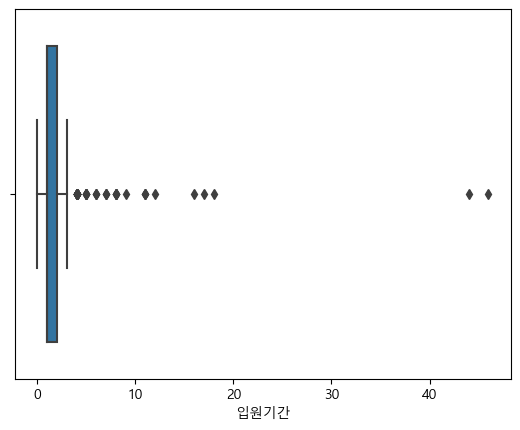

In [79]:
sns.boxplot(data=df_ROSF,x='입원기간')

<Axes: xlabel='입원기간', ylabel='count'>

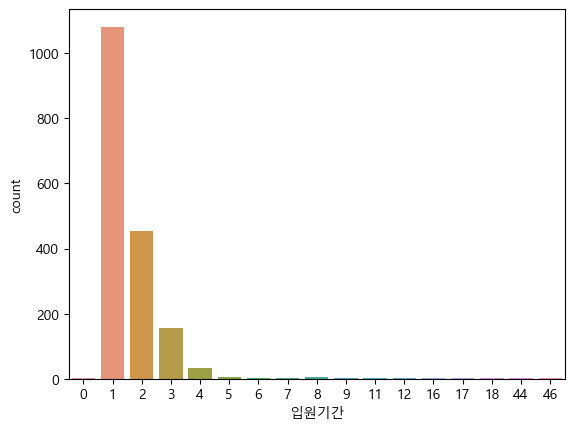

In [81]:
sns.countplot(data=df_ROSF,x='입원기간')

#### 연령
- 연속형

In [48]:
df_ROSF['연령'].describe()

count    1758.000000
mean       41.555745
std        13.427519
min        15.000000
25%        32.000000
50%        41.000000
75%        49.000000
max        84.000000
Name: 연령, dtype: float64

In [49]:
Q1 = df_ROSF['연령'].describe()['25%']
Q3 = df_ROSF['연령'].describe()['75%']
IQR = Q3-Q1

In [50]:
bound_up = Q3 + 1.5 *IQR
bound_down = Q1 - 1.5 *IQR
bound_down, bound_up

(6.5, 74.5)

<Axes: xlabel='연령'>

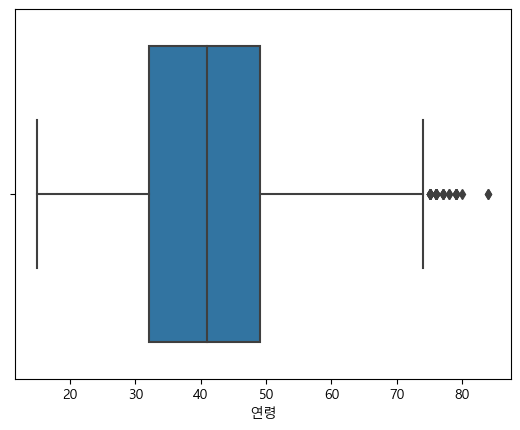

In [51]:
sns.boxplot(data=df_ROSF,x='연령')

<Axes: xlabel='연령', ylabel='Count'>

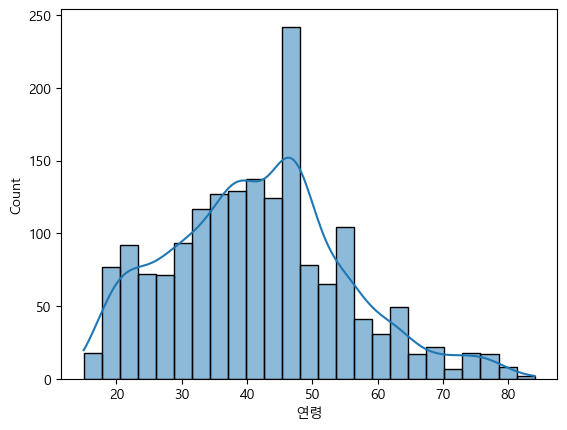

In [52]:
sns.histplot(data=df_ROSF,x='연령', kde=True)

#### Large Lymphocyte
- 정상범위 1500~4500/ul
- 실제 data: 44.9-5.4 : 수치는 *10^2이라 생각해야할듯
- 연속형

In [53]:
df_ROSF['Large Lymphocyte'].describe

<bound method NDFrame.describe of 0       22.8
1       44.9
2       53.0
3       54.7
4       53.8
        ... 
1753    32.4
1754    42.4
1755    30.8
1756     5.4
1757    36.7
Name: Large Lymphocyte, Length: 1758, dtype: float64>

<Axes: xlabel='Large Lymphocyte'>

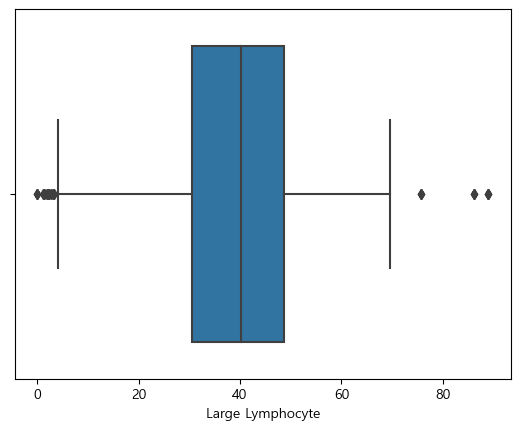

In [54]:
sns.boxplot(data=df_ROSF, x='Large Lymphocyte')

<Axes: xlabel='Large Lymphocyte', ylabel='Count'>

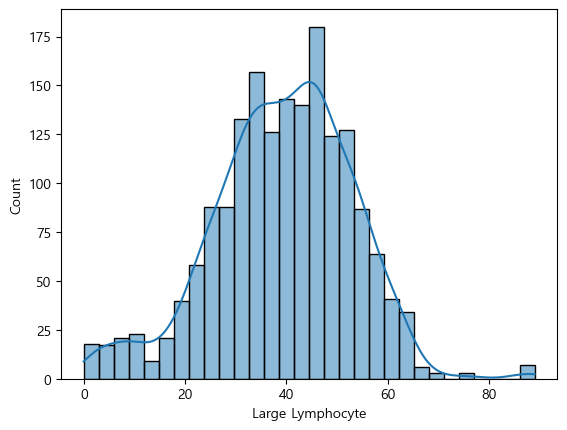

In [55]:
sns.histplot(data=df_ROSF,x='Large Lymphocyte', kde=True)

#### 종양진행여부
- 0: 없음
- 1: 있음
- 범주형

In [56]:
df_ROSF['종양진행여부'].value_counts()

0    1753
1       5
Name: 종양진행여부, dtype: int64

<Axes: xlabel='종양진행여부', ylabel='count'>

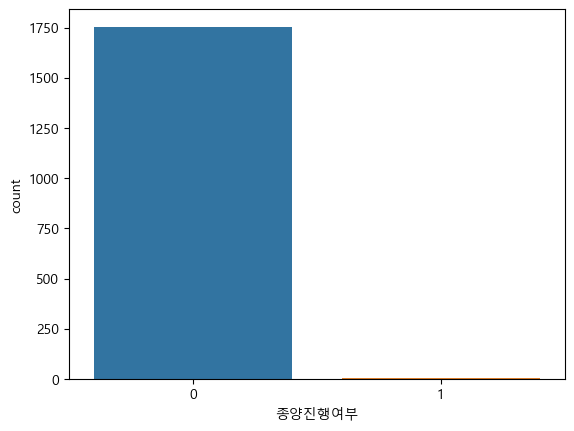

In [57]:
sns.countplot(data=df_ROSF, x='종양진행여부')

#### 디스크단면적
- 연속형
- 50 - 200 px^2

In [58]:
df_ROSF['디스크단면적'].describe()

count    1758.000000
mean     1989.023106
std       312.678694
min      1145.800000
25%      1777.500000
50%      1990.150000
75%      2177.120000
max      3166.140000
Name: 디스크단면적, dtype: float64

<Axes: xlabel='디스크단면적'>

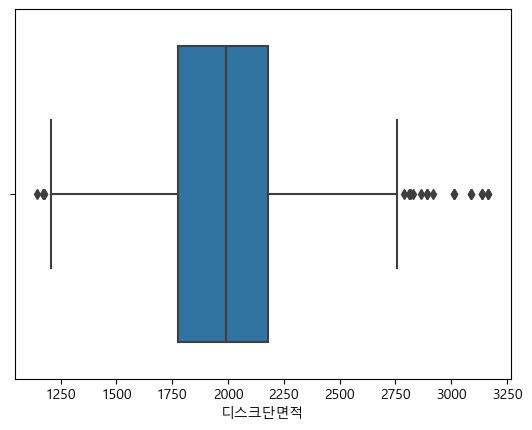

In [59]:
sns.boxplot(data=df_ROSF,x='디스크단면적')

<Axes: xlabel='디스크단면적', ylabel='Count'>

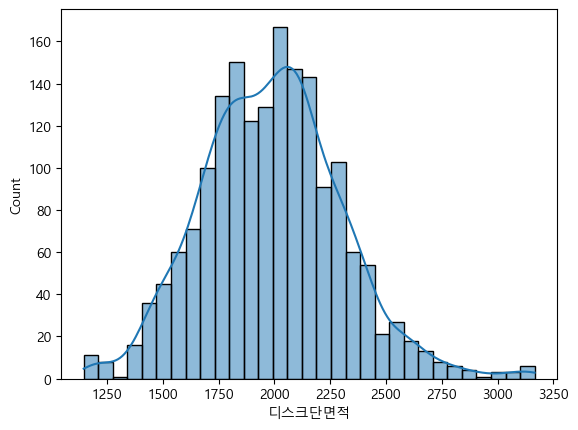

In [60]:
sns.histplot(data=df_ROSF,x='디스크단면적', kde=True)

#### 척추이동척도
- Middle, Down, Up, Extremely down, Extremely up
- 범주형


In [61]:
df_ROSF['척추이동척도'].value_counts()

Middle            1177
Down               471
Up                  60
Extremely down      34
Extremely up        16
Name: 척추이동척도, dtype: int64

<Axes: xlabel='척추이동척도', ylabel='count'>

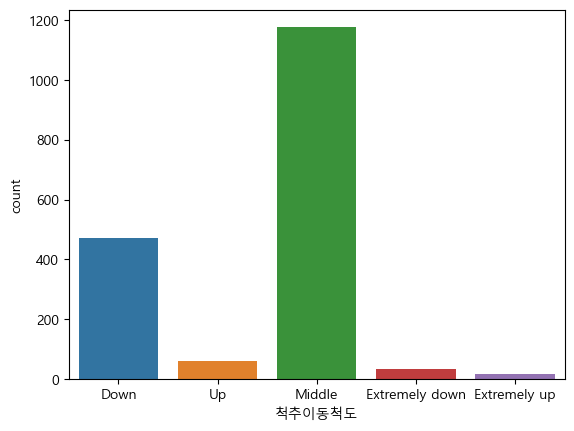

In [62]:
sns.countplot(data=df_ROSF, x='척추이동척도')

#### 수술시간
- 연속형

In [63]:
df_ROSF['수술시간'].describe()

count    1758.000000
mean       62.254835
std        25.075706
min         5.000000
25%        45.000000
50%        60.000000
75%        78.000000
max       220.000000
Name: 수술시간, dtype: float64

<Axes: xlabel='수술시간'>

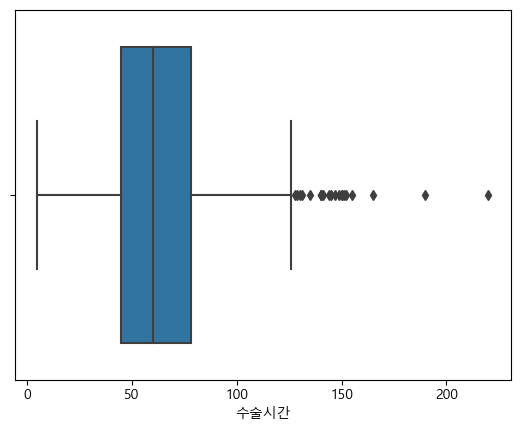

In [64]:
sns.boxplot(data=df_ROSF,x='수술시간')

<Axes: xlabel='수술시간', ylabel='Count'>

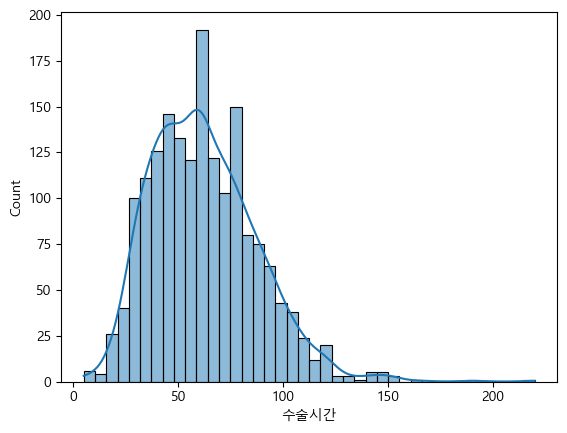

In [65]:
sns.histplot(data=df_ROSF,x='수술시간', kde=True)

#### 수술기법
- 용어 검색: 뤼튼 
- TELD_ Tubular Epidural Lumbar Discectomy
             - 삽입되는 튜브를 통해 디스크 파편 제거 
- IELD_ Intervertebral Endoscopic Lumbar Discectomy
            - 내시경 이용하여 디스크 조직 제거
- 범주형 

In [66]:
df_ROSF['수술기법'].value_counts()

TELD    1622
IELD     136
Name: 수술기법, dtype: int64

<Axes: xlabel='수술기법', ylabel='count'>

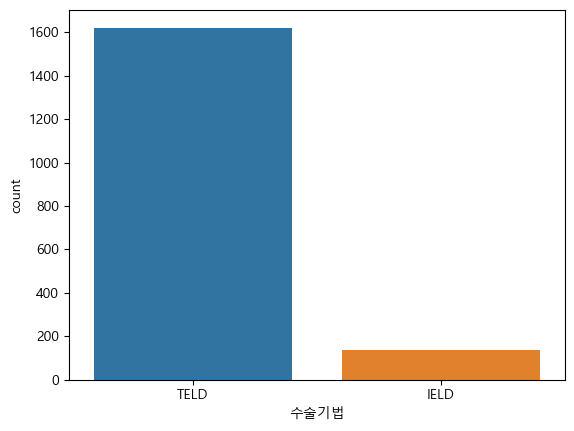

In [67]:
sns.countplot(data=df_ROSF, x='수술기법')

#### Instability
- 척추 안정성
- 0 : 안정성 없음
- 1: 안정성 있음
- 범주형

In [68]:
df_ROSF['Instability'].value_counts()

0    1685
1      73
Name: Instability, dtype: int64

<Axes: xlabel='Instability', ylabel='count'>

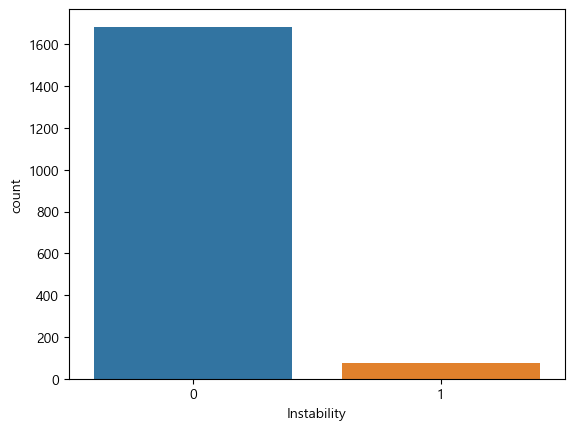

In [69]:
sns.countplot(data=df_ROSF, x='Instability')

#### 혈액형
- 범주형

In [70]:
df_ROSF['혈액형'].value_counts()

RH+A     627
RH+O     502
RH+B     446
RH+AB    183
Name: 혈액형, dtype: int64

<Axes: xlabel='혈액형', ylabel='count'>

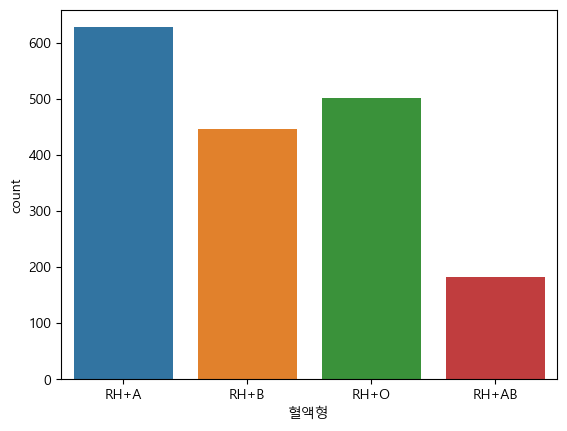

In [71]:
sns.countplot(data=df_ROSF, x='혈액형')

#### 신장, 체중


In [72]:
df_ROSF['신장'].describe()

count    1758.000000
mean      168.065415
std         9.161160
min       140.000000
25%       161.000000
50%       169.000000
75%       175.000000
max       204.000000
Name: 신장, dtype: float64

In [73]:
df_ROSF['체중'].describe()

count    1758.000000
mean       68.148407
std        11.079244
min        35.000000
25%        59.800000
50%        68.000000
75%        75.000000
max       136.100000
Name: 체중, dtype: float64

<Axes: xlabel='신장'>

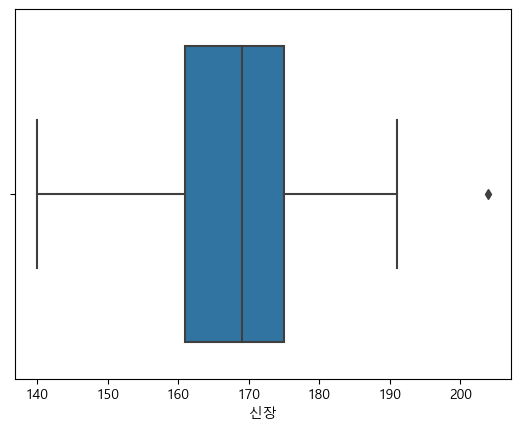

In [74]:
sns.boxplot(data=df_ROSF, x='신장')

<Axes: xlabel='신장', ylabel='Count'>

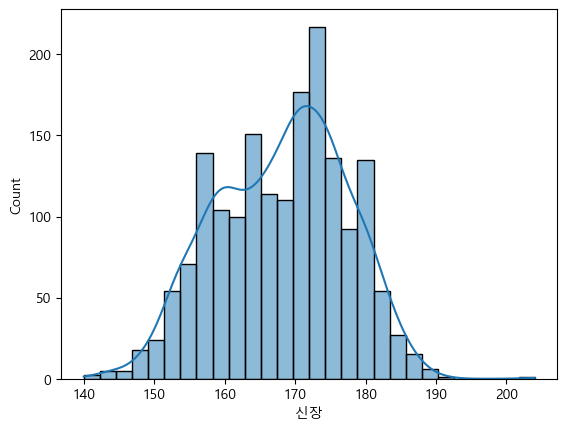

In [75]:
sns.histplot(data=df_ROSF, x='신장', kde=True)

<Axes: xlabel='체중'>

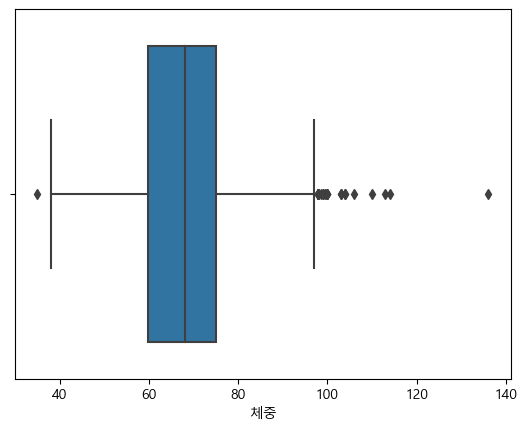

In [76]:
sns.boxplot(data=df_ROSF, x='체중')

<Axes: xlabel='체중', ylabel='Count'>

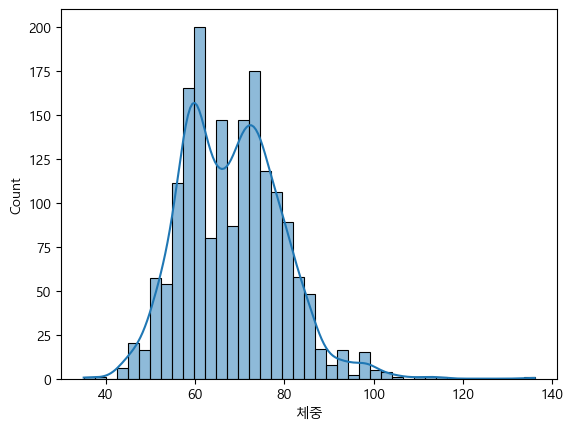

In [77]:
sns.histplot(data=df_ROSF, x='체중', kde=True)